<a href="https://colab.research.google.com/github/agerk/deepLearning/blob/master/recurrent_neural_network_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torch torchvision
!pip install --no-cache-dir -I pillow

    100% |████████████████████████████████| 591.8MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x618f0000 @  0x7f941730a2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 2.0MB 4.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 34.7MB/s 


In [0]:
%matplotlib inline

import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


### Long Shrot Term Mempry (LSTM)

**Problem statment: Watching a TV show and we have and we want to classify an image**

Long Term Memory:
  - Show about nature and Science
  - Lots po forest animals
 
 Short Term Memory: 
  - Trees, Squirrels etc
  
 Event we just saw:
  - Images of a Dog or a Wolf

**Objective: Combine all the three information and make a prediction about what out image is**

- Output: function  (Long_term _memory, short_ term _memory,  event ) 
- Update the Long Term Memory using the hidden state information fom
  - Show about Nature
  - Lost of forest animals and trees
- Update the Short Term Memory: say we want it to forget the show has trees and instead rember Wolves
  - Wolves
  - Squirrels
  
Architecture of LSTM contains fesw gates, suhc as:
  - Forget Gate 
  - Remember Gate
  - Learn Gate 
  - Use Gate 
 
Inside the LSTM archirecture:
- The LTM goes to the **Forget Gate**: It forgets everything that it doesn't consider useful
- The STM and Event joined together in the **Learn Gate**: Containing information that we've recently
- The LSM that we haven't forgotten yet plust the new information that we have learned get joined together in the **Remember Gate**. The Remeber Gate output an updated **New LongTerm Memory**
- The **Use Gate** decides what information we previously know from LTM and what we just learned to make New Short Tem Memory (Output). The output become the new prediction and New Short Tem Memory




### Gated Reccurrent Unit (GRU)


Working Memeory --> Update Gate + Iniput --> Combine Gate + Working Memeory --- > New Working Memeory
 
                                              

### Implimenting Simple RNN: Time Series Predicition

(21,)
(21, 1)


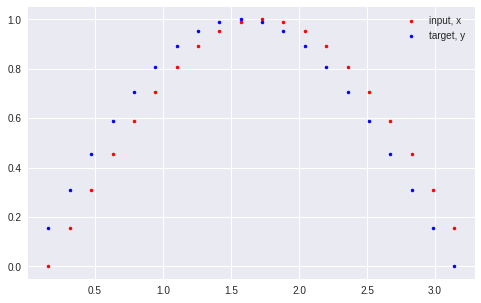

In [5]:
plt.figure(figsize=(8, 5))

# Set time steps/data points in a singel batch
seq_length = 20

# Generate evenly spaced data points-- sine function
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
print(data.shape)
# Add input_size, 1D  
data.resize((seq_length + 1, 1))
print(data.shape)

# Get x and y data points
x = data[:-1]    # all but the last piece of data
y = data[1:]     # all but the first

# Display data
plt.plot(time_steps[1:], x, 'r.', label='input, x')
plt.plot(time_steps[1:], y, 'b.', label='target, y')

plt.legend(loc='best')
plt.show();

---
## Define the RNN

Define an RNN in PyTorch. We'll use `nn.RNN` to create an RNN layer, then we'll add a last, fully-connected layer to get the output size that we want. An RNN takes in a number of parameters:
* **input_size** - the size of the input
* **hidden_dim** - the number of features in the RNN output and in the hidden state
* **n_layers** - the number of layers that make up the RNN, typically 1-3; greater than 1 means that you'll create a stacked RNN
* **batch_first** - whether or not the input/output of the RNN will have the batch_size as the first dimension (batch_size, seq_length, hidden_dim)

Take a look at the [RNN documentation](https://pytorch.org/docs/stable/nn.html#rnn) to read more about recurrent layers.

In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers):
    super(RNN, self).__init__()
    
    self.hidden_dim = hidden_dim
    
    # define an RNN with specified params
    # batch_first means, the first dim will be batch size
    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
    
    # last fully connected layer
    self.fc = nn.Linear(hidden_dim, output_size)
    
  def forward(self, x, hidden):
    # x (batch_size, seq_length, input_size)
    # hidden (n_layers, batch_size, hidden_dim)
    # r_out (batch_size, time_step, hidden_size)
    batch_size = x.size(0)
    
    # get RNN output
    r_out, hidden = self.rnn(x, hidden)
    # shape output to be (batch_size*seq_length, hidden_dim)
    r_out = r_out.view(-1, self.hidden_dim)
    
    # Get final output
    output = self.fc(r_out)
    
    return output, hidden
    
    
    

#### Check the input and output dimensions


In [7]:
# test dims
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced test data points
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

# give a batch_size of 1 as first dim
test_input = torch.Tensor(data).unsqueeze(0)
print('Input size:', test_input.size())

# test out run siezes
test_out, test_h = test_rnn(test_input, None)    # ([batch_size, seq_length, input num features])
print('Output size', test_out.size())   # ([batch_size*seq_length, output_size])
print('Hidden state size: ', test_h.size())   # ([n_layers, out_putsize, hidden_dim])

Input size: torch.Size([1, 20, 1])
Output size torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])


### Training RNN

In [8]:
# hyperparameters
input_size=1
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


### Loss and optimization

### Loss and Optimization

This is a regression problem: can we train an RNN to accurately predict the next data point, given a current data point?
> * The data points are coordinate values, so to compare a predicted and ground_truth point, we'll use a regression loss: the mean squared error.
* It's typical to use an Adam optimizer for recurrent models.

In [0]:
#MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

### Defining the training function

This function takes in an rnn, a number of steps to train for, and returns a trained rnn. This function is also responsible for displaying the loss and the predictions, every so often.

#### Hidden State

Pay close attention to the hidden state, here:
* Before looping over a batch of training data, the hidden state is initialized
* After a new hidden state is generated by the rnn, we get the latest hidden state, and use that as input to the rnn for the following steps

In [0]:
# train RNN
def train_rnn(rnn, n_steps, print_every):
  """Train RNN and return training loss"""
  
  # initialize the hidden state
  hidden = None
  
  for batch_i, step in enumerate(range(n_steps)):
    # defining the training data on the fly
    time_steps = np.linspace(step * np.pi, (step + 1) * np.pi, seq_length + 1)
    data = np.sin(time_steps)
    # input_size = 1
    data.resize((seq_length + 1, 1))
    
    x = data[:-1]
    y = data[1:]
    
    # convert data into Tensors
    x_tensor = torch.Tensor(x).unsqueeze(0)
    y_tensor = torch.Tensor(y)
    
    # output from the rnn
    prediction, hidden = rnn(x_tensor, hidden)
    
    # Representing Memory
    # make a new variable for hidden and detach the hidden state from its history
    # it will avoid backpropagating through the entire history
    hidden = hidden.data
    
    # calculate the loss
    loss = criterion(prediction, y_tensor)
    # Zero gradient
    optimizer.zero_grad()
    # perform backprop and update weight
    loss.backward()
    optimizer.step()
    
    # display loss and predicitons
    if batch_i % print_every == 0:
      print('Loss: ', loss.item())
      # input
      plt.plot(time_steps[1:], x, 'r.')   
      # prediction
      plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')
      plt.show()
      
  return rnn
           
    
    

Loss:  0.6463488936424255


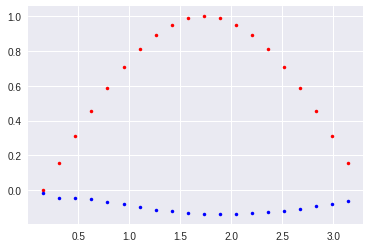

Loss:  0.027645887807011604


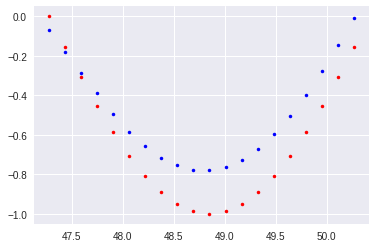

Loss:  0.008163757622241974


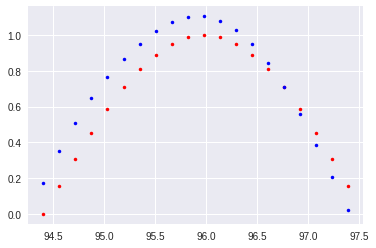

Loss:  0.0004969568690285087


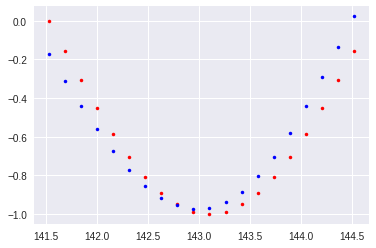

Loss:  0.0003033490793313831


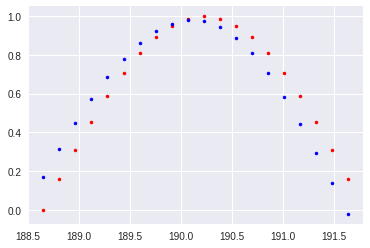

In [11]:
# Train the rnn and moitor results
n_steps = 75
print_every = 15

trained_rnn = train_rnn(rnn, n_steps, print_every)

### Time-Series Prediction

Time-series prediction can be applied to many tasks. Think about weather forecasting or predicting the ebb and flow of stock market prices. You can even try to generate predictions much further in the future than just one time step!

### Character Wise RNN

- We would pass the sequence into the RNN one character at a time
- Predict the next character in the input sequence
- The network will learn sequence of characters that will look like the original sequence


In [0]:
from google.colab import files
import os
img_dir = '/tmp/nst'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

In [13]:
# Load data
data = files.upload()
!ls /tmp/nst

In [14]:
# open text file and read in data as `text`
with open('anna.txt', 'r') as f:
    text = f.read()

FileNotFoundError: ignored

In [0]:
print(text[:100])
tuple(set(text[:20]))

### Tokenization

In [0]:
# Encode the next text and map each character to an integer and vice versa

# Create two dicts:
# 1. int-to-char (vocabulary), whcih maps integer to characters
# 2. char-to-int, whic maps characters to unique integers
chars = tuple(set(text))   # get unique chars
int2char = dict(enumerate(chars))
# int2char
char2int = {ch: ii for ii, ch in int2char.items()}
# char2int

# encode the text
encoded = np.array([char2int[ch] for ch in text])
# encoded

In [0]:
# print out the first 100 char encoding
encoded[:100]

### Pre-processing the data

As you can see in our char-RNN image above, our LSTM expects an input that is **one-hot encoded** meaning that each character is converted into an integer (via our created dictionary) and *then* converted into a column vector where only it's corresponding integer index will have the value of 1 and the rest of the vector will be filled with 0's. Since we're one-hot encoding the data, let's make a function to do that!


In [0]:
def one_hot_encode(arr, n_labels):
  """Returns one-hot-enoded version of the tokens"""
  
  # Initialize the encoded array
  one_hot = np.zeros((np.multiply(*arr.shape), n_labels), dtype=np.float32)
  print('arr flatten', arr.flatten())
  print(one_hot[np.arange(one_hot.shape[0]), arr.flatten()] )
  # Fill the appropriate elements with ones
  one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.
  print(one_hot)
  # Reshape it to get back the original array
  one_hot = one_hot.reshape((*arr.shape, n_labels))
  
  return one_hot

In [34]:
# Check the function
test_seq = np.array([[3, 5, 1]])
# test_seq.shape
one_hot = one_hot_encode(test_seq, 8)

print(one_hot)

arr flatten [3 5 1]
[0. 0. 0.]
[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
[[[0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]]]


## Making training mini-batches

### Creating Batches

**1. The first thing we need to do is discard some of the text so we only have completely full mini-batches. **

Each batch contains $N \times M$ characters, where $N$ is the batch size (the number of sequences in a batch) and $M$ is the seq_length or number of time steps in a sequence. Then, to get the total number of batches, $K$, that we can make from the array `arr`, you divide the length of `arr` by the number of characters per batch. Once you know the number of batches, you can get the total number of characters to keep from `arr`, $N * M * K$.

**2. After that, we need to split `arr` into $N$ batches. ** 

You can do this using `arr.reshape(size)` where `size` is a tuple containing the dimensions sizes of the reshaped array. We know we want $N$ sequences in a batch, so let's make that the size of the first dimension. For the second dimension, you can use `-1` as a placeholder in the size, it'll fill up the array with the appropriate data for you. After this, you should have an array that is $N \times (M * K)$.

**3. Now that we have this array, we can iterate through it to get our mini-batches. **

The idea is each batch is a $N \times M$ window on the $N \times (M * K)$ array. For each subsequent batch, the window moves over by `seq_length`. We also want to create both the input and target arrays. Remember that the targets are just the inputs shifted over by one character. The way I like to do this window is use `range` to take steps of size `n_steps` from $0$ to `arr.shape[1]`, the total number of tokens in each sequence. That way, the integers you get from `range` always point to the start of a batch, and each window is `seq_length` wide.



In [0]:
def get_batches(arr, batch_size, seq_length):
  """Create a generator that returns batches of size
  batch_sze x seq_length from arr
  
  Args:
    arr: Input array to make batches  
    batch_size: Batch size, the number of sequence per batch
    aeq_length: Number of encoded chars in a seuence
    
  Returns:
    Batch
  
  """
  
  # get the num of char in one complete mini-batch
  batch_size_total = batch_size * seq_length
  
  # total number of complete batche we can make
  n_batches = len(arr)//batch_size_total
  
  # keep only enough characters to make full batches
  arr = arr[:n_batches * batch_size_total]
  # reshapr into bacth_size rows
  arr = arr.reshape((batch_size, -1))
  
  # iterate through the array, one sequence at a time
  for n in range(0, arr.shape[1], seq_length):
    # num of features
    x = arr[:, n:n+seq_length]
    # get rargets, shifted by one-- next char
    y = np.zeros_like(x)
    try:
      y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+seq_length]
    except IndexError:
      y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
    yield x, y
      
    

In [0]:
# Test the mini-batch implimentation
batches = get_batches(encoded, 8, 50)
x, y = next(batches)

In [56]:
# check if x and y values are shifted by 1 char
print('x: \n', x[:10, :10])
print('\ny: \n', y[:10, :10])

x: 
 [[70 72 15 39 17  7 81 55 59 37]
 [46 11 73 55 17 72 15 17 55 15]
 [ 7 73 47 55 11 81 55 15 55 51]
 [46 55 17 72  7 55 68 72 32  7]
 [55 46 15 23 55 72  7 81 55 17]
 [68 34 46 46 32 11 73 55 15 73]
 [55 54 73 73 15 55 72 15 47 55]
 [10 78 71 11 73 46  4 43 44 55]]

y: 
 [[72 15 39 17  7 81 55 59 37 37]
 [11 73 55 17 72 15 17 55 15 17]
 [73 47 55 11 81 55 15 55 51 11]
 [55 17 72  7 55 68 72 32  7 51]
 [46 15 23 55 72  7 81 55 17  7]
 [34 46 46 32 11 73 55 15 73 47]
 [54 73 73 15 55 72 15 47 55 46]
 [78 71 11 73 46  4 43 44 55  1]]


---
### LSTM Inputs/Outputs

You can create a basic [LSTM layer](https://pytorch.org/docs/stable/nn.html#lstm) as follows

```python
self.lstm = nn.LSTM(input_size, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
```

where `input_size` is the number of characters this cell expects to see as sequential input, and `n_hidden` is the number of units in the hidden layers in the cell. And we can add dropout by adding a dropout parameter with a specified probability; this will automatically add dropout to the inputs or outputs. Finally, in the `forward` function, we can stack up the LSTM cells into layers using `.view`. With this, you pass in a list of cells and it will send the output of one cell into the next cell.

We also need to create an initial hidden state of all zeros. This is done like so

```python
self.init_hidden()
```

In [55]:
# check if GPU is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


In [0]:
class CharRNN(nn.Module):
  
  def __init__(self, tokens, n_hidden=256, n_layers=2, 
              drop_prob=0.5, lr=0.001):
    super().__init__()
    self.drop_prob = drop_prob
    self.n_layers = n_layers
    self.n_hidden = n_hidden
    self.lr = lr
    
    # character dictionaries
    self.chars = tokens
    self.int2char = dict(enumerate(self.chars))
    self.char2int = {ch: ii for ii, ch in self.int2char.items()}
    
    # define the layers
    self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers, 
                       dropout=drop_prob, batch_first=True)
    # define a dropout layer
    self.dropout = nn.Dropout(drop_prob)
    self.fc = nn.Linear(n_hidden, len(self.chars))
    
    # define the final, fully-connected output layer
    self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
    
  def forward(self, x, hidden):
    """ Forward pass through the network. 
    These inputs are x, and the hidden/cell state 'hidden'
      
    """
    # get the outputs and the new hidden state from the lstm
    r_output, hidden = self.lstm(x, hidden)
        
    # pass through a dropout layer
    out = self.dropout(r_output)
        
        
    # Stack up LSTM outputs using view
    # you may need to use contiguous to reshape the output
    out = out.contiguous().view(-1, self.n_hidden)
        
    ## TODO: put x through the fully-connected layer
    out = self.fc(out)
      
    return out, hidden 
    
  def init_hidden(self, batch_size):
    
    """Initialie hidden state"""
    # create two net tensors with sizes n_layers x batch_size x n_hidden,
    # initialied to zero, for hidden state and cell state of LSTM
    weight = next(self.parameters()).data
      
    if (train_on_gpu):
      hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
    else:
      (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
      weight.new(self.n_layers, batch_size, self.n_hidden).zero_())
          
    return hidden 
  
    

## Train

The train function gives us the ability to set the number of epochs, the learning rate, and other parameters.

Below we're using an Adam optimizer and cross entropy loss since we are looking at character class scores as output. We calculate the loss and perform backpropagation, as usual!

A couple of details about training: 
>* Within the batch loop, we detach the hidden state from its history; this time setting it equal to a new *tuple* variable because an LSTM has a hidden state that is a tuple of the hidden and cell states.
* We use [`clip_grad_norm_`](https://pytorch.org/docs/stable/_modules/torch/nn/utils/clip_grad.html) to help prevent exploding gradients.

In [0]:
def train(net, data, epochs=10, batch_size=10, seq_length=50, lr=0.001, clip=5, val_frac=0.1, print_every=10):
    ''' Training a network 
    
        Arguments
        ---------
        
        net: CharRNN network
        data: text data to train the network
        epochs: Number of epochs to train
        batch_size: Number of mini-sequences per mini-batch, aka batch size
        seq_length: Number of character steps per mini-batch
        lr: learning rate
        clip: gradient clipping
        val_frac: Fraction of data to hold out for validation
        print_every: Number of steps for printing training and validation loss
    
    '''
    net.train()
    
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    # create training and validation data
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]
    
    if(train_on_gpu):
        net.cuda()
    
    counter = 0
    n_chars = len(net.chars)
    for e in range(epochs):
        # initialize hidden state
        h = net.init_hidden(batch_size)
        
        for x, y in get_batches(data, batch_size, seq_length):
            counter += 1
            
            # One-hot encode our data and make them Torch tensors
            x = one_hot_encode(x, n_chars)
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            
            if(train_on_gpu):
                inputs, targets = inputs.cuda(), targets.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            # zero accumulated gradients
            net.zero_grad()
            
            # get the output from the model
            output, h = net(inputs, h)
            
            # calculate the loss and perform backprop
            loss = criterion(output, targets.view(batch_size*seq_length))
            loss.backward()
            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            opt.step()
            
            # loss stats
            if counter % print_every == 0:
                # Get validation loss
                val_h = net.init_hidden(batch_size)
                val_losses = []
                net.eval()
                for x, y in get_batches(val_data, batch_size, seq_length):
                    # One-hot encode our data and make them Torch tensors
                    x = one_hot_encode(x, n_chars)
                    x, y = torch.from_numpy(x), torch.from_numpy(y)
                    
                    # Creating new variables for the hidden state, otherwise
                    # we'd backprop through the entire training history
                    val_h = tuple([each.data for each in val_h])
                    
                    inputs, targets = x, y
                    if(train_on_gpu):
                        inputs, targets = inputs.cuda(), targets.cuda()

                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(output, targets.view(batch_size*seq_length))
                
                    val_losses.append(val_loss.item())
                
                net.train() # reset to train mode after iterationg through validation data
                
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.4f}...".format(loss.item()),
                      "Val Loss: {:.4f}".format(np.mean(val_losses)))


## Instantiating the model

Now we can actually train the network. First we'll create the network itself, with some given hyperparameters. Then, define the mini-batches sizes, and start training!

In [72]:
# define and print the net
n_hidden=512
n_layers=2

net = CharRNN(chars, n_hidden, n_layers)
print(net)

CharRNN(
  (lstm): LSTM(83, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5)
  (fc): Linear(in_features=512, out_features=83, bias=True)
)


In [73]:
batch_size = 128
seq_length = 100
n_epochs = 20 # start smaller if you are just testing initial behavior

# train the model
train(net, encoded, epochs=n_epochs, batch_size=batch_size, seq_length=seq_length, lr=0.001, print_every=10)

Epoch: 1/20... Step: 10... Loss: 3.2655... Val Loss: 3.2052
Epoch: 1/20... Step: 20... Loss: 3.1530... Val Loss: 3.1363
Epoch: 1/20... Step: 30... Loss: 3.1428... Val Loss: 3.1224
Epoch: 1/20... Step: 40... Loss: 3.1151... Val Loss: 3.1191
Epoch: 1/20... Step: 50... Loss: 3.1415... Val Loss: 3.1176
Epoch: 1/20... Step: 60... Loss: 3.1177... Val Loss: 3.1153
Epoch: 1/20... Step: 70... Loss: 3.1036... Val Loss: 3.1128
Epoch: 1/20... Step: 80... Loss: 3.1165... Val Loss: 3.1067
Epoch: 1/20... Step: 90... Loss: 3.1073... Val Loss: 3.0911
Epoch: 1/20... Step: 100... Loss: 3.0673... Val Loss: 3.0542
Epoch: 1/20... Step: 110... Loss: 3.0478... Val Loss: 3.0243
Epoch: 1/20... Step: 120... Loss: 2.9348... Val Loss: 2.9195
Epoch: 1/20... Step: 130... Loss: 2.8495... Val Loss: 2.8203
Epoch: 2/20... Step: 140... Loss: 2.7682... Val Loss: 2.7276
Epoch: 2/20... Step: 150... Loss: 2.6524... Val Loss: 2.6140
Epoch: 2/20... Step: 160... Loss: 2.5741... Val Loss: 2.5434
Epoch: 2/20... Step: 170... Loss:

---
## Making Predictions

Now that the model is trained, we'll want to sample from it and make predictions about next characters! To sample, we pass in a character and have the network predict the next character. Then we take that character, pass it back in, and get another predicted character. Just keep doing this and you'll generate a bunch of text!

### A note on the `predict`  function

The output of our RNN is from a fully-connected layer and it outputs a **distribution of next-character scores**.

> To actually get the next character, we apply a softmax function, which gives us a *probability* distribution that we can then sample to predict the next character.

### Top K sampling

Our predictions come from a categorical probability distribution over all the possible characters. We can make the sample text and make it more reasonable to handle (with less variables) by only considering some $K$ most probable characters. This will prevent the network from giving us completely absurd characters while allowing it to introduce some noise and randomness into the sampled text. Read more about [topk, here](https://pytorch.org/docs/stable/torch.html#torch.topk).


In [0]:
def predict(net, char, h=None, top_k=None):
  
    ''' Given a character, predict the next character.
    Returns the predicted character and the hidden state.
    '''
        
    # tensor inputs
    x = np.array([[net.char2int[char]]])
    x = one_hot_encode(x, len(net.chars))
    inputs = torch.from_numpy(x)
        
    if(train_on_gpu):
      inputs = inputs.cuda()
        
      # detach hidden state from history
      h = tuple([each.data for each in h])
      # get the output of the model
      out, h = net(inputs, h)

      # get the character probabilities
      p = F.softmax(out, dim=1).data
      if(train_on_gpu):
        
        p = p.cpu() # move to cpu
        
       # get top characters
      if top_k is None:
        top_ch = np.arange(len(net.chars))
      else:
        p, top_ch = p.topk(top_k)
        top_ch = top_ch.numpy().squeeze()
        
      # select the likely next character with some element of randomness
      p = p.numpy().squeeze()
      char = np.random.choice(top_ch, p=p/p.sum())
        
      # return the encoded value of the predicted char and the hidden state
      return net.int2char[char], h

### Priming and generating text 

Typically you'll want to prime the network so you can build up a hidden state. Otherwise the network will start out generating characters at random. In general the first bunch of characters will be a little rough since it hasn't built up a long history of characters to predict from.

In [0]:
def sample(net, size, prime='The', top_k=None):
        
    if(train_on_gpu):
        net.cuda()
    else:
        net.cpu()
    
    net.eval() # eval mode
    
    # First off, run through the prime characters
    chars = [ch for ch in prime]
    h = net.init_hidden(1)
    for ch in prime:
      char, h = predict(net, ch, h, top_k=top_k)

    chars.append(char)
    
    # Now pass in the previous character and get a new one
    for ii in range(size):
      char, h = predict(net, chars[-1], h, top_k=top_k)
      chars.append(char)

    return ''.join(chars)

In [86]:
print(sample(net, 1000, prime='Anna', top_k=5))

Anna
had never tented, she would be detailing; and he feeling that he
could not said all to the face with her, and as
she was so as intense that the connections were sitting about his silence.

"I don't know you that
he could
so all more all silent too,"
said Stepan Arkadyevitch. "You're not seeing her,
I am to be all to her above the mension of their mind that the chuedress at high, what is
a cantily to go on an end a grass of the man, the thange is
never been a supprossing official assument as
the
same it. But it's out of the minute. It seens a master, all her simple-say of
the meetings."

"I'd not
telling the sole of her soul. Tuntative in a past of the carriage. Tell the crack, and this was to be all and disappreach that they murt cant to be stronger, because
here. I have already discancied it, and I won't be at the string which has to spend the family, and the one thing it is stracting
in her still
more attitude. With the from this world. This shrewd trues with you. He's no sort o